## Portfolio Part 2

The goal of the second Portfolio task is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will continue using the movielens dataset provided in Portfolio task 1. 

### Import Cleaned MovieLens Dataset
Save the cleaned data (i.e., after removing missing values and outliers) in the Portfolio task 1 as a csv file named 'movielens_data_clean.csv'. You may need to use the Pandas method, i.e., `to_csv`, for doing this. After that, please import the csv file (i.e., 'movielens_data_clean') and print out its total length.

In [3]:
# importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Import of MovieLens Dataset and saving to new file name. 

In [4]:
clean_df= pd.read_csv('files/movielens_data_clean.csv')

### The total length of the clean_dataframe.

In [5]:
#Printing out the total lenght of the clean_dataframe.
len_cleandf = len(clean_df)
print("The total length of the data is ", len_cleandf)

The total length of the data is  99022


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between age/gender/genre/occupation and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, genre and occupation) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [6]:
# solutions for number of columns
clean_df.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467


#### FINDING: 
    There are 8 number of columns in above dataset. 

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99022 entries, 0 to 99021
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      99022 non-null  int64  
 1   age         99022 non-null  float64
 2   gender      99022 non-null  object 
 3   occupation  99022 non-null  object 
 4   movieId     99022 non-null  int64  
 5   rating      99022 non-null  float64
 6   genre       99022 non-null  object 
 7   timestamp   99022 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.0+ MB


#### FINDING: 
    Datatypes of each columns:
        Numerical type: age, movield, rating, timestamp
        Categorical type: gender, occupation, genre            

### Conversion of categorical values into numerical on gender, genre and occupation column


In [37]:
ord_enc = OrdinalEncoder()
clean_df["gender_numeral"] = ord_enc.fit_transform(clean_df[["gender"]])
clean_df["genre_numeral"] = ord_enc.fit_transform(clean_df[["genre"]])
clean_df["occupation_numeral"] = ord_enc.fit_transform(clean_df[["occupation"]])
clean_df.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp,gender_numeral,genre_numeral,occupation_numeral
0,196,49.0,1.0,19.0,242,3.0,4.0,881250949,1.0,4.0,19.0
1,22,25.0,1.0,19.0,377,1.0,3.0,878887116,1.0,3.0,19.0
2,244,28.0,1.0,18.0,51,2.0,13.0,880606923,1.0,13.0,18.0
3,298,44.0,1.0,6.0,474,4.0,16.0,884182806,1.0,16.0,6.0
4,253,26.0,0.0,10.0,465,5.0,1.0,891628467,0.0,1.0,10.0


### Correlation 

In [24]:
# correlations between age/gender/genre/occupation and rating 
clean_df.corr()

,userId,age,gender,occupation,movieId,rating,genre,timestamp,gender_numeral,genre_numeral,occupation_numeral
userId,1.000000,-0.080977,-0.024763,0.104191,0.011892,-0.006904,-0.000262,0.015204,-0.024763,-0.000262,0.104191
age,-0.080977,1.000000,0.037999,-0.369586,-0.012055,0.056841,0.027275,0.151483,0.037999,0.027275,-0.369586
gender,-0.024763,0.037999,1.000000,0.014923,-0.034870,-0.001498,-0.001066,-0.036433,1.000000,-0.001066,0.014923
occupation,0.104191,-0.369586,0.014923,1.000000,0.003867,-0.029204,-0.011517,0.026495,0.014923,-0.011517,1.000000
movieId,0.011892,-0.012055,-0.034870,0.003867,1.000000,-0.189780,-0.043913,0.042392,-0.034870,-0.043913,0.003867
rating,-0.006904,0.056841,-0.001498,-0.029204,-0.189780,1.000000,0.044561,-0.010309,-0.001498,0.044561,-0.029204
genre,-0.000262,0.027275,-0.001066,-0.011517,-0.043913,0.044561,1.000000,0.008471,-0.001066,1.000000,-0.011517
timestamp,0.015204,0.151483,-0.036433,0.026495,0.042392,-0.010309,0.008471,1.000000,-0.036433,0.008471,0.026495
gender_numeral,-0.024763,0.037999,1.000000,0.014923,-0.034870,-0.001498,-0.001066,-0.036433,1.000000,-0.001066,0.014923
genre_numeral,-0.000262,0.027275,-0.001066,-0.011517,-0.043913,0.044561,1.000000,0.008471,-0.001066,1.000000,-0.011517


In [55]:
clean_df['age'].corr(clean_df['rating'])


0.05684068891822535

In [56]:
clean_df['gender'].corr(clean_df['rating'])


-0.001498304457912424

In [57]:
clean_df['occupation'].corr(clean_df['rating'])


-0.02920399622265269

In [58]:
clean_df['genre'].corr(clean_df['rating'])

0.044561354728212405

ANALYSIS:
   1. Age and Rating have a positive correlation association. 
   2. Gender and Rating have negative correlation association.
   3. Occupation and Rating have negative correlation association.
   4. Genre and Rating have a positive correlation association. 
   6. The most correlated features regarding rating are genre and age.
   7. The least correlated features reagrding rating are occupation and gender. 

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

### Case 1: Training data containing 10% of the entire data

In [72]:
train_case1, test_case1 = train_test_split(clean_df, test_size = 0.1, random_state = 42)
print("Case 1: \nThe shape of both the datasets containing 10% of the entire data:")
print("\tTraining dataset- ", train_case1.shape)
print("\tTesting dataset- ", test_case1.shape)

Case 1: 
The shape of both the datasets containing 10% of the entire data:
	Training dataset-  (89119, 11)
	Testing dataset-  (9903, 11)


### Case 2: Training data containing 90% of the entire data

In [73]:
# CASE 2:
train_case2, test_case2= train_test_split(clean_df, test_size = 0.9)
print("Case 2: \nThe shape of both the datasets containing 90% of the entire data:")
print("\tTraining dataset- ",train_case2.shape)
print("\tTesting dataset- ",test_case2.shape)

Case 2: 
The shape of both the datasets containing 90% of the entire data:
	Training dataset-  (9902, 11)
	Testing dataset-  (89120, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively. 
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

### Case 1 :
    1. Model-a: Evaluation and training the data using with two most correlated input features

In [74]:
reg_a = linear_model.LinearRegression()
X_train_model_a = train_case1[['age', 'genre']]
y_train_model_a = train_case1[['rating']]

X_test_model_a = test_case1[['age', 'genre']]
y_test_model_a = test_case1[['rating']]

reg_a.fit(X_train_model_a, y_train_model_a)
print("y = x *", reg_a.coef_, "+", reg_a.intercept_)

y = x * [[0.0054961  0.00966934]] + [3.27473152]


Evaluation and printing of model_a

In [76]:
predicted_a = reg_a.predict(X_test_model_a)
mse_a = ((np.array(y_test_model_a)-predicted_a)**2).sum()/len(y_test_model_a)
r2_a = r2_score(y_test_model_a, predicted_a)
print("The Mean Square Error (MSE):", mse_a)
print("Root MSE:", np.sqrt(mse_a))

The Mean Square Error (MSE): 1.2499995827023402
Root MSE: 1.1180338021286924


    2. Model-b: Evaluating and training data with two most correlated input features

In [96]:
reg_b = linear_model.LinearRegression()
X_train_model_b = train_case1[['occupation', 'gender']]
y_train_model_b = train_case1[['rating']]

X_test_model_b = test_case1[['occupation', 'gender']]
y_test_model_b = test_case1[['gender']]

reg_b.fit(X_train_model_b, y_train_model_b)
print("y = x *", reg_b.coef_, "+", reg_b.intercept_)

y = x * [[-0.00537353  0.00129178]] + [3.58409867]


In [103]:
predicted_b = reg_b.predict(X_test_model_b)
mse_b = ((np.array(y_test_model_b)-predicted_b)**2).sum()/len(y_test_model_b)
r2_b = r2_score(y_test_model_b, predicted_b)
print("The Mean Square Error (MSE):", mse_b)
print("Root MSE:", np.sqrt(mse_b))

The Mean Square Error (MSE): 7.9464961399225045
Root MSE: 2.8189530219431655


### Case 2 :
    3. Model-c: Evaluating and training data in case 2 with two most correlated input features

In [117]:
reg_c = linear_model.LinearRegression()
X_train_model_c = train_case2[['age', 'genre']]
y_train_model_c = train_case2['rating']

X_test_model_c = test_case2[['age', 'genre']]
y_test_model_c = test_case2['rating']

reg_c.fit(X_train_model_c, y_train_model_c)
print("y = x *", reg_c.coef_, "+", reg_c.intercept_)

y = x * [0.00701981 0.00902857] + 3.245140885934004


In [118]:
predicted_c = reg_c.predict(X_test_model_c)
mse_c = ((np.array(y_test_model_c)-predicted_c)**2).sum()/len(y_test_model_c)
r2_c = r2_score(y_test_model_c, predicted_c)
print("The Mean Square Error (MSE):", mse_c)
print("Root MSE:", np.sqrt(mse_c))

The Mean Square Error (MSE): 1.2619215099432155
Root MSE: 1.1233527985202225


    4. Model-d: Evaluating and training dat with two most correlated input features

In [119]:
reg_d = linear_model.LinearRegression()
X_train_model_d = train_case2[['occupation', 'gender']]
y_train_model_d = train_case2['rating']

X_test_model_d = test_case2[['occupation', 'gender']]
y_test_model_d = test_case2['rating']

reg_d.fit(X_train_model_d, y_train_model_d)
print("y = x *", reg_d.coef_, "+", reg_d.intercept_)

y = x * [-0.00373002 -0.00219133] + 3.5857884198314207


In [122]:
predicted_d = reg_d.predict(X_test_model_d)
mse_d = ((np.array(y_test_model_d)-predicted_d)**2).sum()/len(y_test_model_d)

r2_d = r2_score(y_test_model_d, predicted_d)

print("The Mean Square Error (MSE):", mse_d)
print("Root MSE:", np.sqrt(mse_b))

The Mean Square Error (MSE): 1.2666949464435313
Root MSE: 2.8189530219431655


# Visualize, Compare and Analyze the Results

    Visulize the results, and perform insightful analysis on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
    Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please explain the possible reasons.



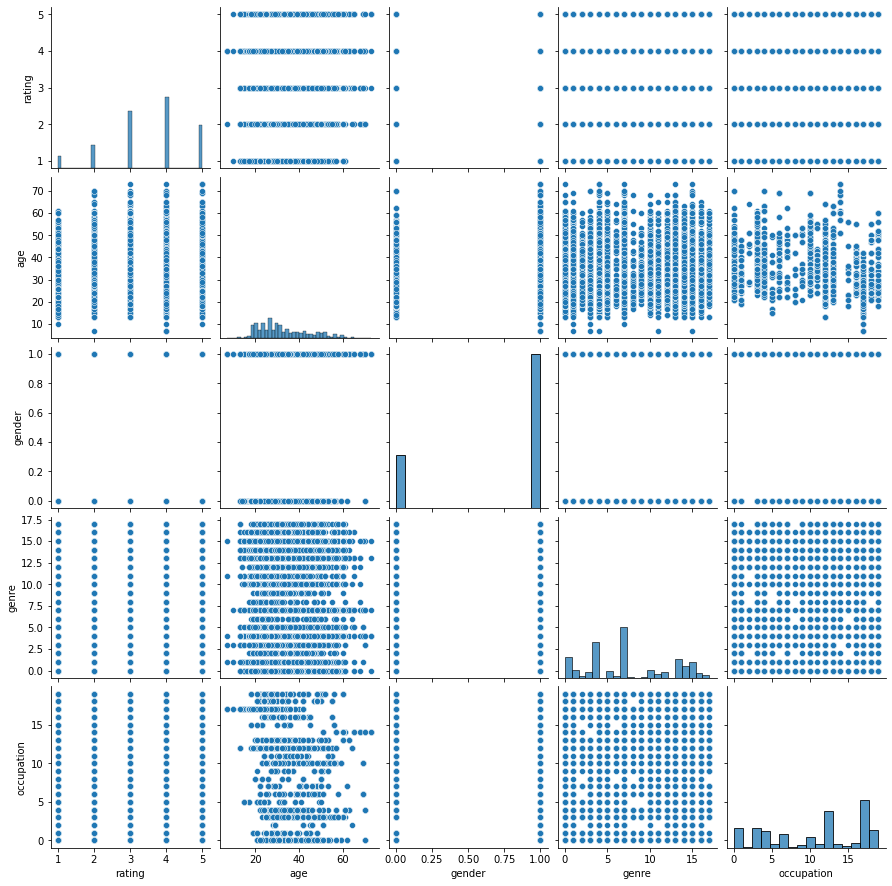

In [124]:
sns.pairplot(test_case1[['rating', 'age', 'gender', 'genre', 'occupation']])

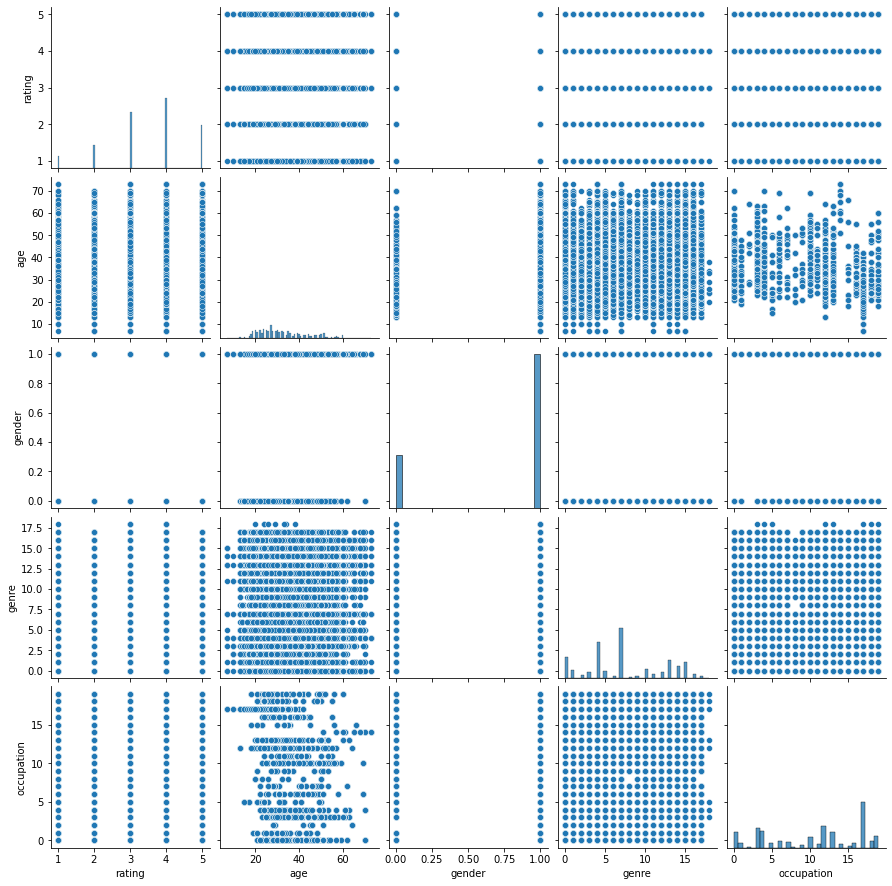

In [126]:
sns.pairplot(test_case2[['rating', 'age', 'gender', 'genre', 'occupation']])

In Case 1, the value for MSE and root MSE are gained to be identical to each other, and similar patter follows in case 2 as well. The models are not the best, however they are better as the values of MSE from both the case 1 and 2 are greater than 0.
Secondly, siince the root RME lies inbetween 0.2 and 0.5, it shows that the model can relatively predict the data accurately. 